# IMPORTING LIBRARIES OF PYTHON

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# LOADING DATASET

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#checking unique values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

RowNumber
[    1     2     3 ...  9998  9999 10000]

CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 71

# DATA VISUALIZATIONS

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

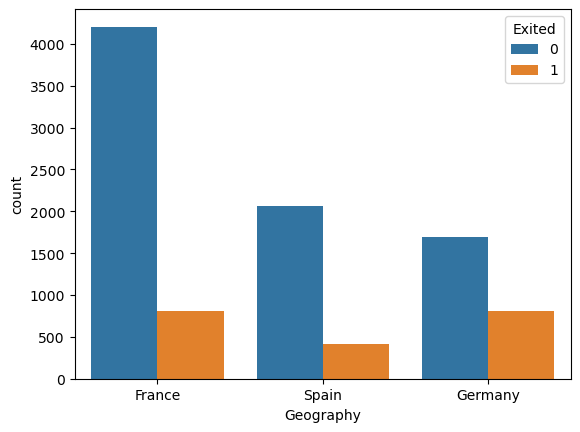

In [8]:
sns.countplot(x='Geography',hue='Exited',data=df)

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

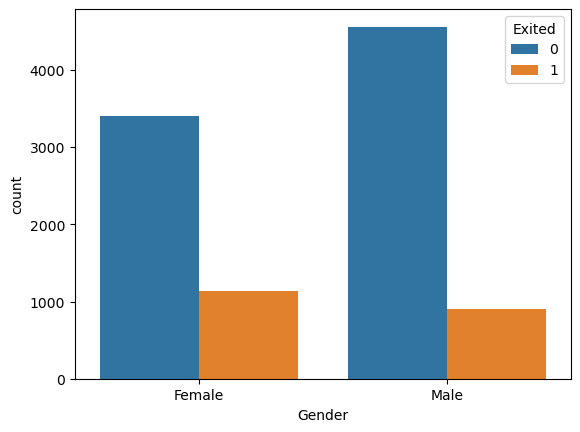

In [10]:
sns.countplot(x='Gender',hue='Exited',data=df)

In [11]:
df.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

In [12]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [13]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: xlabel='NumOfProducts', ylabel='count'>

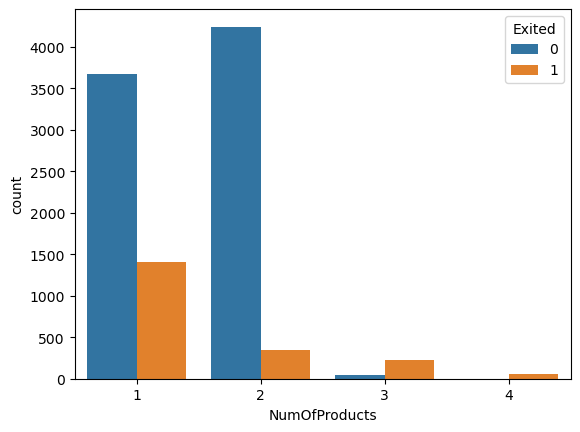

In [14]:
sns.countplot(x='NumOfProducts',hue='Exited',data=df)

In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='count'>

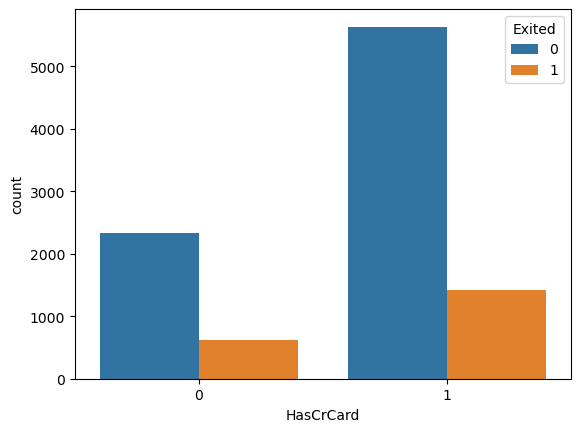

In [16]:
sns.countplot(x='HasCrCard',hue='Exited',data=df)

In [17]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

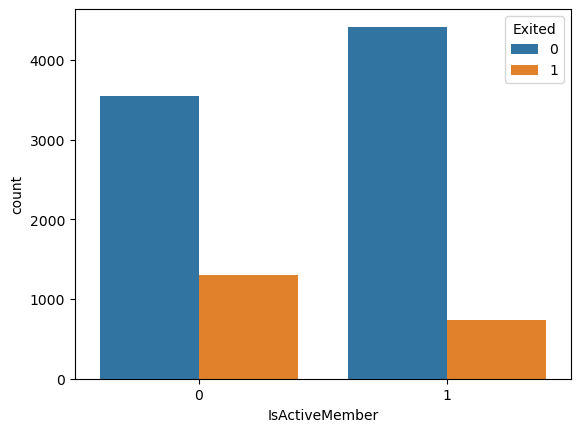

In [18]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

In [19]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

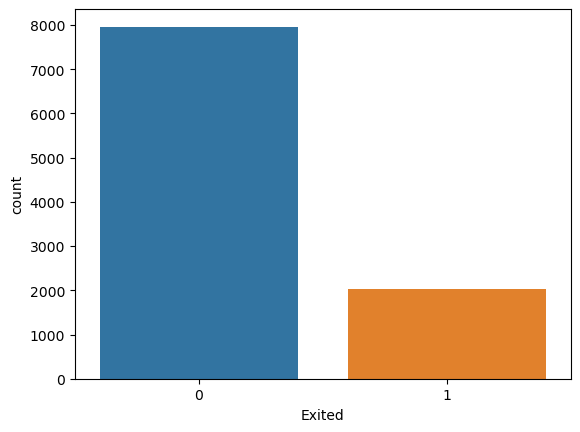

In [20]:
sns.countplot(x='Exited',data=df)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

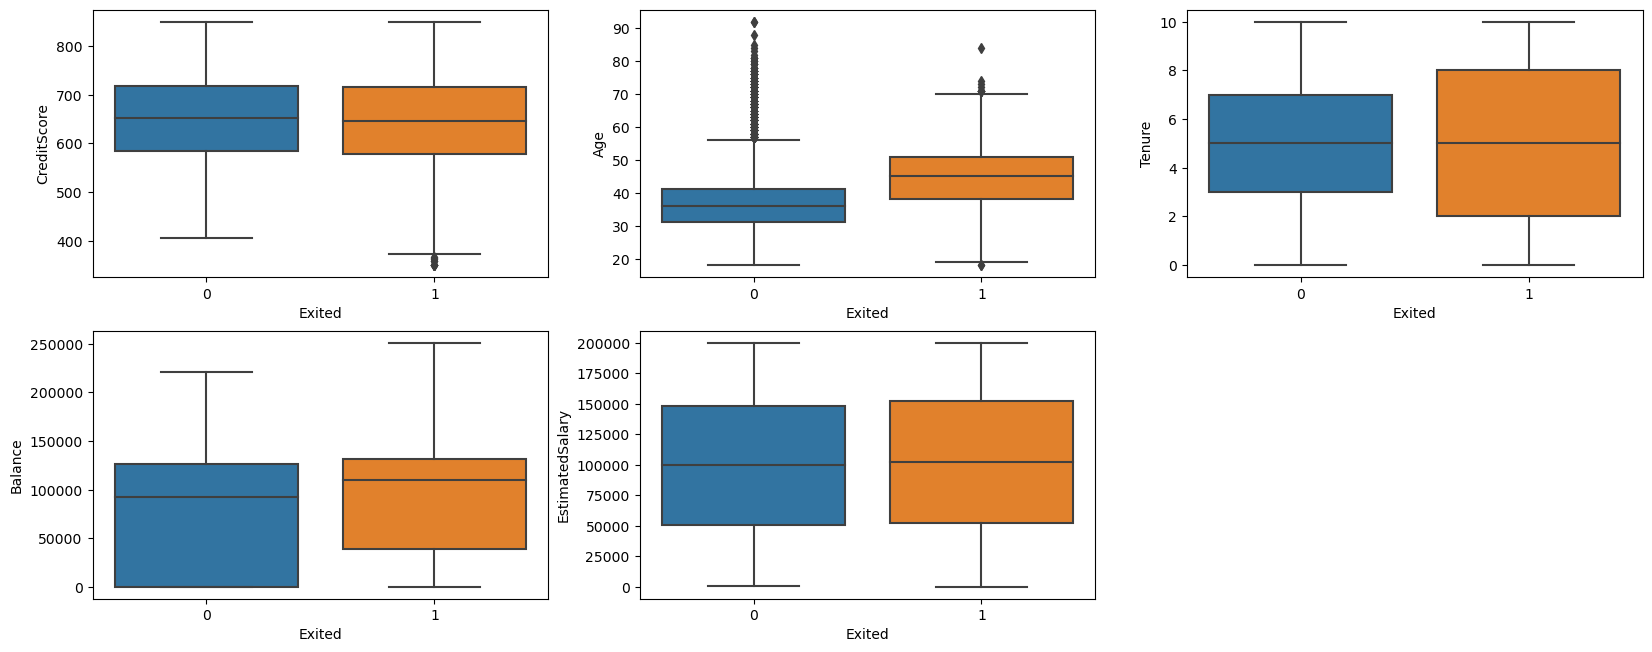

In [21]:
plt.figure(figsize=(20,16))
plt.subplot(4,3,1)
sns.boxplot(x='Exited',y='CreditScore',data=df)
plt.subplot(4,3,2)
sns.boxplot(x='Exited',y='Age',data=df)
plt.subplot(4,3,3)
sns.boxplot(x='Exited',y='Tenure',data=df)
plt.subplot(4,3,4)
sns.boxplot(x='Exited',y='Balance',data=df)
plt.subplot(4,3,5)
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)

In [22]:
df.shape

(10000, 14)

In [23]:
df=df.drop('RowNumber',axis=1)
df=df.drop('CustomerId',axis=1)
df=df.drop('Surname',axis=1)

In [24]:
df.shape

(10000, 11)

# EDA AND DATA CLEANING

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df['Geography']=LabelEncoder().fit_transform(df['Geography'])

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [28]:
x=df.drop('Exited',axis=1)
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
feature_x=StandardScaler().fit_transform(x)
feature_x

array([[-0.32622142, -0.90188624,  1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738,  1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624,  1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624,  1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057, -0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624,  1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(feature_x,y,test_size=.25,random_state=42)

In [32]:
xtest

array([[-0.56419726,  0.30659057, -0.91241915, ..., -1.54776799,
        -1.03067011, -1.01381126],
       [-0.28483432, -0.90188624, -0.91241915, ...,  0.64609167,
         0.97024255,  0.8049205 ],
       [-0.51246338,  1.51506738,  1.09598752, ...,  0.64609167,
        -1.03067011, -0.72214659],
       ...,
       [ 1.21544816, -0.90188624, -0.91241915, ...,  0.64609167,
         0.97024255, -1.59585902],
       [ 0.40839965, -0.90188624,  1.09598752, ..., -1.54776799,
        -1.03067011, -0.32687687],
       [-0.48142306,  0.30659057,  1.09598752, ...,  0.64609167,
         0.97024255, -0.72448541]])

# MODEL BUILDING USING LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()

In [35]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [36]:
pred=model.predict(xtest)

In [37]:
pred.shape

(2500,)

In [38]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(ytest,pred)

0.8124

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(ytest,pred)

array([[1941,   62],
       [ 407,   90]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2003
           1       0.59      0.18      0.28       497

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.58      2500
weighted avg       0.78      0.81      0.77      2500

